# 증식을 사용안한 코드

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '../data/cat_dog_full/train'
validation_dir = '../data/cat_dog_full/validation'

# ImageDataGenerator 생성
# train data 생성 ImageDataGenerator, validation data 생성 ImageDataGenerator 각각 생성
# 정규화(MinMaxScaling 이용)
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,                # target directory
    classes=['cats', 'dogs'], # 순서대로 0,1..., classes 속성을 생략하면 폴더 순서대로 label이 결정
    target_size=(150,150),    # 일반적으로 정방향으로 resize, CNN구조에 따라 이 값은 달라진다
    batch_size=100,          # 한번에 500개 이미지 가져와서 변환, label에 상관 없이 가져온다
    class_mode='binary'       # 다중분류면 categorical(default)
                              # 'sparse도 이용가능 - onehot처리 안하고 사용
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,               
    classes=['cats', 'dogs'], 
    target_size=(150,150),   
    batch_size=100,            
    class_mode='binary'
)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), 
                 activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())

model.compile(optimizer=Adam(learning_rate=1e-3), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# steps_per_epoch : 몇번 뽑아야 1 epoch이 되는가
history = model.fit(train_generator, steps_per_epoch=140, epochs=30, 
                    validation_data=validation_generator,
                    validation_steps=60)

In [ ]:
# history 객체 확인
print(history.history.keys())

train_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

train_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(train_loss, color='r', label='training')
plt.plot(validation_loss, color='b', label='validation')
plt.legend()
plt.show()

# 증식을 이용한 코드

In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '../data/cat_dog_full/train'
validation_dir = '../data/cat_dog_full/validation'

# ImageDataGenerator 생성
# train data 생성 ImageDataGenerator, validation data 생성 ImageDataGenerator 각각 생성
# 정규화(MinMaxScaling 이용)
train_datagen = ImageDataGenerator(rescale=1/255,                     
                                   rotation_range=20, 
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,                # target directory
    classes=['cats', 'dogs'], # 순서대로 0,1..., classes 속성을 생략하면 폴더 순서대로 label이 결정
    target_size=(150,150),    # 일반적으로 정방향으로 resize, CNN구조에 따라 이 값은 달라진다
    batch_size=100,            # 한번에 20개 이미지 가져와서 변환, label에 상관 없이 가져온다
    class_mode='binary'       # 다중분류면 categorical(default)
                              # 'sparse도 이용가능 - onehot처리 안하고 사용
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,               
    classes=['cats', 'dogs'], 
    target_size=(150,150),   
    batch_size=100,            
    class_mode='binary'
)

Found 14000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), 
                 activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())

model.compile(optimizer=Adam(learning_rate=1e-3), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# steps_per_epoch : 몇번 뽑아야 1 epoch이 되는가
history = model.fit(train_generator, steps_per_epoch=140, epochs=50, 
                    validation_data=validation_generator,
                    validation_steps=60)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

140/140 [==============================] - 89s 638ms/step - loss: 0.1967 - accuracy: 0.9216 - val_loss: 0.2271 - val_accuracy: 0.9093
Epoch 43/50
140/140 [==============================] - 97s 696ms/step - loss: 0.1846 - accuracy: 0.9243 - val_loss: 0.2606 - val_accuracy: 0.8943
Epoch 44/50
140/140 [==============================] - 91s 650ms/step - loss: 0.1885 - accuracy: 0.9241 - val_loss: 0.2124 - val_accuracy: 0.9172
Epoch 45/50
140/140 [==============================] - 89s 634ms/step - loss: 0.1937 - accuracy: 0.9195 - val_loss: 0.1989 - val_accuracy: 0.9202
Epoch 46/50
140/140 [==============================] - 95s 678ms/step - loss: 0.1917 - accuracy: 0.9210 - val_loss: 0.2228 - val_accuracy: 0.9105
Epoch 47/50
140/140 [==============================] - 95s 677ms/step - loss: 0.1823 - accuracy: 0.9263 - val_loss: 0.2064 - val_accuracy: 0.9163
Epoch 48/50
140/140 [==============================] - 93s 663ms/step - loss: 0.1863 - accuracy: 0.9221 - val_loss: 0.2391 - val_accurac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


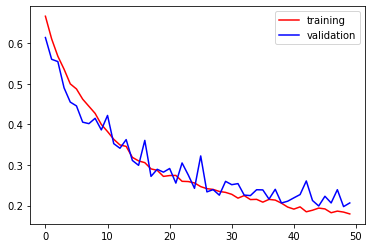

In [5]:
# history 객체 확인
print(history.history.keys())

train_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

train_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(train_loss, color='r', label='training')
plt.plot(validation_loss, color='b', label='validation')
plt.legend()
plt.show()